## CHAPTER 2: Calculus

### 2.1 Basic Caclulus with SciPy

In [1]:
#Caclcus with SciPy
#Diffrentiation with SciPy

#Define f(x) = e^-x

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

f = lambda x: np.exp(-x**2)

deriv = derivative(f, 2, 1e-6)

print(deriv)

-0.07326255555863137


In [2]:
#third derivative                                                   

deriv3 = derivative(f, 2, 1e-6, n=3)

print(deriv3)

#does not print correct result, erro                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

ValueError: 'order' (the number of points used to compute the derivative), must be at least the derivative order 'n' + 1.

In [3]:
#find integration with SciPy

import scipy.integrate as integrate

integral = integrate.quad(f, 0, np.inf)

print(integral)

(0.8862269254527579, 7.101318390915439e-09)


### Comparison of Differentiation Formulae

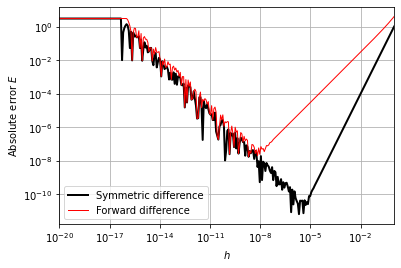

In [7]:
# Eh.ipynb

import numpy as np
import matplotlib.pyplot as plt

h = np.logspace(-20, 0, 300)
x = 1
f = lambda x: x**3
actual = 3*x**2

fx = f(x)
fxp = f(x+h)
fxm = f(x-h)

est1 = (fxp - fx)/h
est2 = (fxp - fxm)/(2*h)

err1 = abs(actual-est1)
err2 = abs(actual-est2)

plt.loglog(h, err2, 'k', lw=2)
plt.loglog(h, err1, 'r', lw=1)
plt.legend(['Symmetric difference', 'Forward difference'])
plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error $E$')
plt.xlim([1e-20, 1])
plt.grid('on')
plt.show()

#works really well

### 2.3 Taylor Series

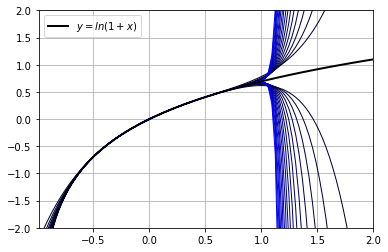

In [16]:
#taylor.ipynb

import numpy as np
import matplotlib.pyplot as plt

def nth_term(x,n):
    return -(-1)**n*x**n/n

S = 0
n_max = 40
x = np.linspace(-0.99, 2, 100)

for n in np.arange(1,n_max+1):
    S += nth_term(x,n)
    b = n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',color = (0,0,b), lw = 1)
        
plt.plot(x, np.log(1+x),lw=2,color = 'k')
plt.legend([r'$y=ln(1+x)$'], loc='upper left')
plt.xlim([-0.99,2])
plt.ylim([-2,2])
plt.grid('on')
plt.show()

In [60]:
#factorial test

import scipy

n = 2

print(scipy.math.factorial(2*n+1))

120


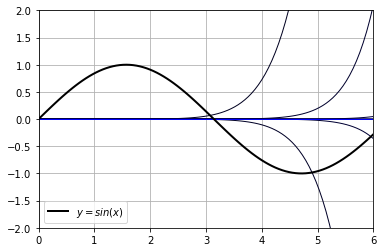

In [52]:
#for sin

import numpy as np
import matplotlib.pyplot as plt
import scipy

def nth_term(x,n):
    return ((-(-1)**n)*x**(2*n-1))/scipy.special.factorial(2*n-1)

S = 0
n_max = 40
x = np.linspace(0, 6, 100)

for n in np.arange(1,n_max+1):
    S =+ nth_term(x,n)
    b = n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',color = (0,0,b), lw = 1)
        
plt.plot(x, np.sin(x),lw=2,color = 'k')
plt.legend([r'$y=sin(x)$'], loc='lower left')
plt.xlim([0,6])
plt.ylim([-2,2])
plt.grid('on')
plt.show()

#cannot figure out what Siri altered in the orignal code for log(x+1), can you offer a hint perhaps. 

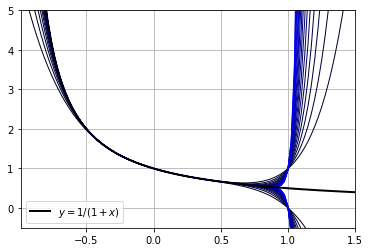

In [28]:
#1/1+x

import numpy as np
import matplotlib.pyplot as plt

def nth_term(x,n):
    return (-x)**n

S = 0
n_max = 40
x = np.linspace(-0.99, 1.5, 100)

for n in np.arange(0,n_max+1):
    S += nth_term(x,n)
    b = n/n_max
    if (n>=5):
        plt.plot(x,S,label='_nolegend_',color = (0,0,b), lw = 1)
        
plt.plot(x, 1/(1+x),lw=2,color = 'k')
plt.legend([r'$y=1/(1+x)$'], loc='lower left')
plt.xlim([-0.99,1.5])
plt.ylim([-0.5,5])
plt.grid('on')
plt.show()

#SUCCESS!

### 2.4 Taylor's Theorem and the Remainder Term

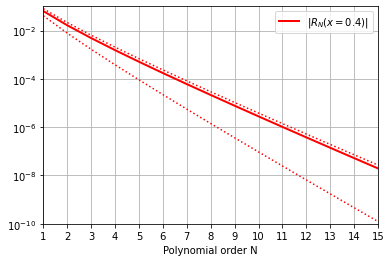

In [84]:
#taylorthm.ipynb

import numpy as np
import matplotlib.pyplot as plt

def Nth_term(x,N):
    return -(-1)**N*x**N/N
    
x = 0.4
N_max = 15 
Nlist = np.arange(1,N_max+1)
P = 0
PNlist = []
lowlist=[]
hilist=[]

for N in Nlist:
    P = P + Nth_term(x,N)
    PNlist.append(P)
    Np= N+1
    low = (x/(1+x))**Np/Np
    lowlist.append(low)    
    hi = x**Np/Np
    hilist.append(hi)   
    
RN = abs(PNlist-np.log(1+x))
        
plt.semilogy(Nlist, RN, lw=2, 
             color = 'r')
plt.semilogy(Nlist,lowlist,'r:',
             Nlist,hilist, 'r:')
plt.legend([r'$|R_N(x=0.4)|$']) 
plt.xticks(Nlist) 
plt.xlim([1,N_max])
plt.xlabel('Polynomial order N')
plt.ylim([1e-10,0.1])
plt.grid('on')
plt.show()

### 2.5 A continuous, nowhere differentiable function

In [85]:
#weierstrass.ipynb

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib

a, b = 0.5, 13
m_max = 25
x = np.linspace(-2,2,2500)

def fn(x,n,a,b):
    return a**n*np.cos(np.pi*x*b**n)

def g(x,a,b):
    S = 0
    for i in np.arange(0,m_max+1):
        S += fn(x,i,a,b)
    return S

fig,ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

Wfunc, = plt.plot(x, g(x,a,b),'k',lw=0.5)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid('on')
plt.title('The Weierstrass Function')

axa = plt.axes([0.15, 0.05, 0.7, 0.02])
a_slide = Slider(axa, 'a', 0, 1, 
                 valstep=0.01, valinit=a)

axb = plt.axes([0.15, 0.1, 0.7, 0.02])
b_slide = Slider(axb, 'b', 1, 25, 
                 valstep=0.01, valinit=b)

def update(val):
    a = a_slide.val
    b = b_slide.val
    Wfunc.set_ydata(g(x,a,b))
    fig.canvas.draw_idle()

a_slide.on_changed(update)
b_slide.on_changed(update)

plt.show() 

Using matplotlib backend: <object object at 0x00000139089E58C0>


The GUI is not responding on my device after many attemps. I will try to understand the issue later.

### 2.6 Intergation with Trapezium Rule

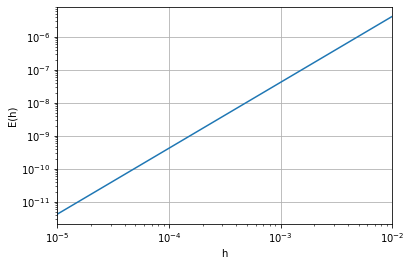

Gradient of line = 1.99999.


In [1]:
#trapezium.ipynb

import numpy as np
import matplotlib.pyplot as plt

a, b = 1, 2
N = np.round(np.logspace(2,5))

actual= 2*np.log(2)-1
hlist = (b-a)/N
error = []

def trapz(y,h):
    return h*(sum(y)-(y[0]+y[-1])/2)

for n in N:
    x = np.linspace(a,b,int(n+1))
    y = np.log(x)
    h = (b-a)/n
    estim = trapz(y,h)
    error.append(actual-estim)
    
plt.loglog(hlist, np.abs(error))
plt.xlim([1e-5, 1e-2])
plt.xlabel('h')
plt.ylabel('E(h)')
plt.grid('on')
plt.show()

k=(np.log(error[0])-np.log(error[-1]))/\
  (np.log(hlist[0])-np.log(hlist[-1]))
print(f'Gradient of line = {k:.5f}.')

### 2.7 Integration with Simpson's Rule

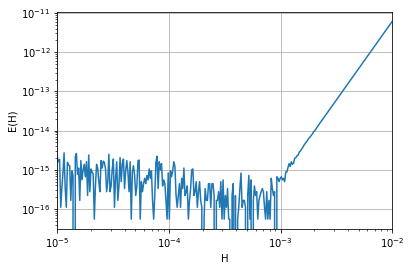

Gradient of line = 3.99997.


In [2]:
#simpson.ipynb

import numpy as np
import matplotlib.pyplot as plt

a, b = 1, 2
N = np.round(np.logspace(2,5,300))
actual= 2*np.log(2)-1
Hlist = (b-a)/N
error = []

def simp(y,h):
    return (h/3)*(y[0]+y[-1]+\
    4*sum(y[1:-1:2])+2*sum(y[2:-1:2]))

for n in N:
    n2 = 2*n
    x = np.linspace(a,b,int(n2+1))
    y = np.log(x)
    h = (b-a)/n2
    estim = simp(y,h)
    error.append(actual-estim)
    
plt.loglog(Hlist , np.abs(error))
plt.xlim([1e-5,1e-2])
plt.xlabel('H')
plt.ylabel('E(H)')
plt.grid('on')
plt.show()

k=(np.log(error[0])-np.log(error[50]))/\
  (np.log(Hlist[0])-np.log(Hlist[50]))
print(f'Gradient of line = {k:.5f}.')

### 2.8 Improper Integrals

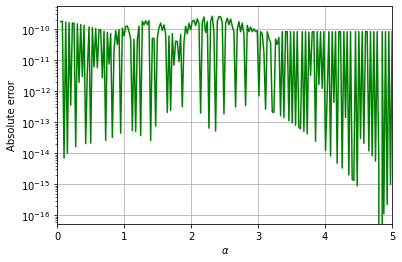

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

alpha = np.linspace(0.05,5,200)
error = []
f = lambda x: np.exp(-x**2)
g = lambda x: np.exp(-1/x**2)/x**2

exact = 0.5*np.sqrt(np.pi)
h=1e-3

for a in alpha:
    N1 = int(a/h)
    N2 = int(1/(a*h))
    x1 = np.linspace(0,a,N1)
    x2 = np.linspace(1e-8,1/a,N2)
    
    integ  = simps(f(x1),x1) + simps(g(x2),x2)
    err = abs(exact-integ)
    error.append(err)

plt.semilogy(alpha,error,'g')
plt.xlim([0,5])
plt.xlabel(r'$\alpha$')
plt.ylabel('Absolute error')
plt.grid('on')
plt.show()

### 2.9 Fourier series

In [5]:
#fourier.ipynb

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib

nmax = 5 
pi = np.pi
x = np.linspace(-2*pi,2*pi,1000)

def f(xarray):
    y = np.zeros_like(xarray)
    for ind, x in enumerate(xarray):
        xmod = x%(2*pi)
        if (xmod<pi and xmod>=0):
            y[ind] = 1
    return y

def Fourier(x,nmax):
    S = 0
    for n in np.arange(1,nmax+1,2):
        S += np.sin(n*x)/n
    return 0.5+ 2*S/pi 

fig,ax = plt.subplots()
plt.subplots_adjust(bottom=0.15)

plt.plot(x, f(x),'r',lw=1)
Ffunc,= plt.plot(x, Fourier(x,nmax),'b',
        lw=0.5)
plt.xlim([-2*pi, 2*pi])
plt.ylim([-0.2, 1.2])
plt.grid('on')
plt.title(r'Fourier series up to $n$ terms')

axn = plt.axes([0.15, 0.05, 0.7, 0.03])
n_slide = Slider(axn, 'n', 1, 101, 
          valstep = 2, valinit = nmax)

def update(val):
    nmax = n_slide.val
    Ffunc.set_ydata(Fourier(x,nmax))
    fig.canvas.draw_idle()

n_slide.on_changed(update)

plt.show() 

Using matplotlib backend: <object object at 0x000001AC808AA3E0>


Again the interactive plot window is not respondong. I have tried using another web browser however I was met with more complications.